In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import pandas as pd

In [2]:
training_set=pd.read_csv("Training9.csv")

In [3]:
len(training_set)

520

In [4]:
training_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 640x480 with 0 Axes>

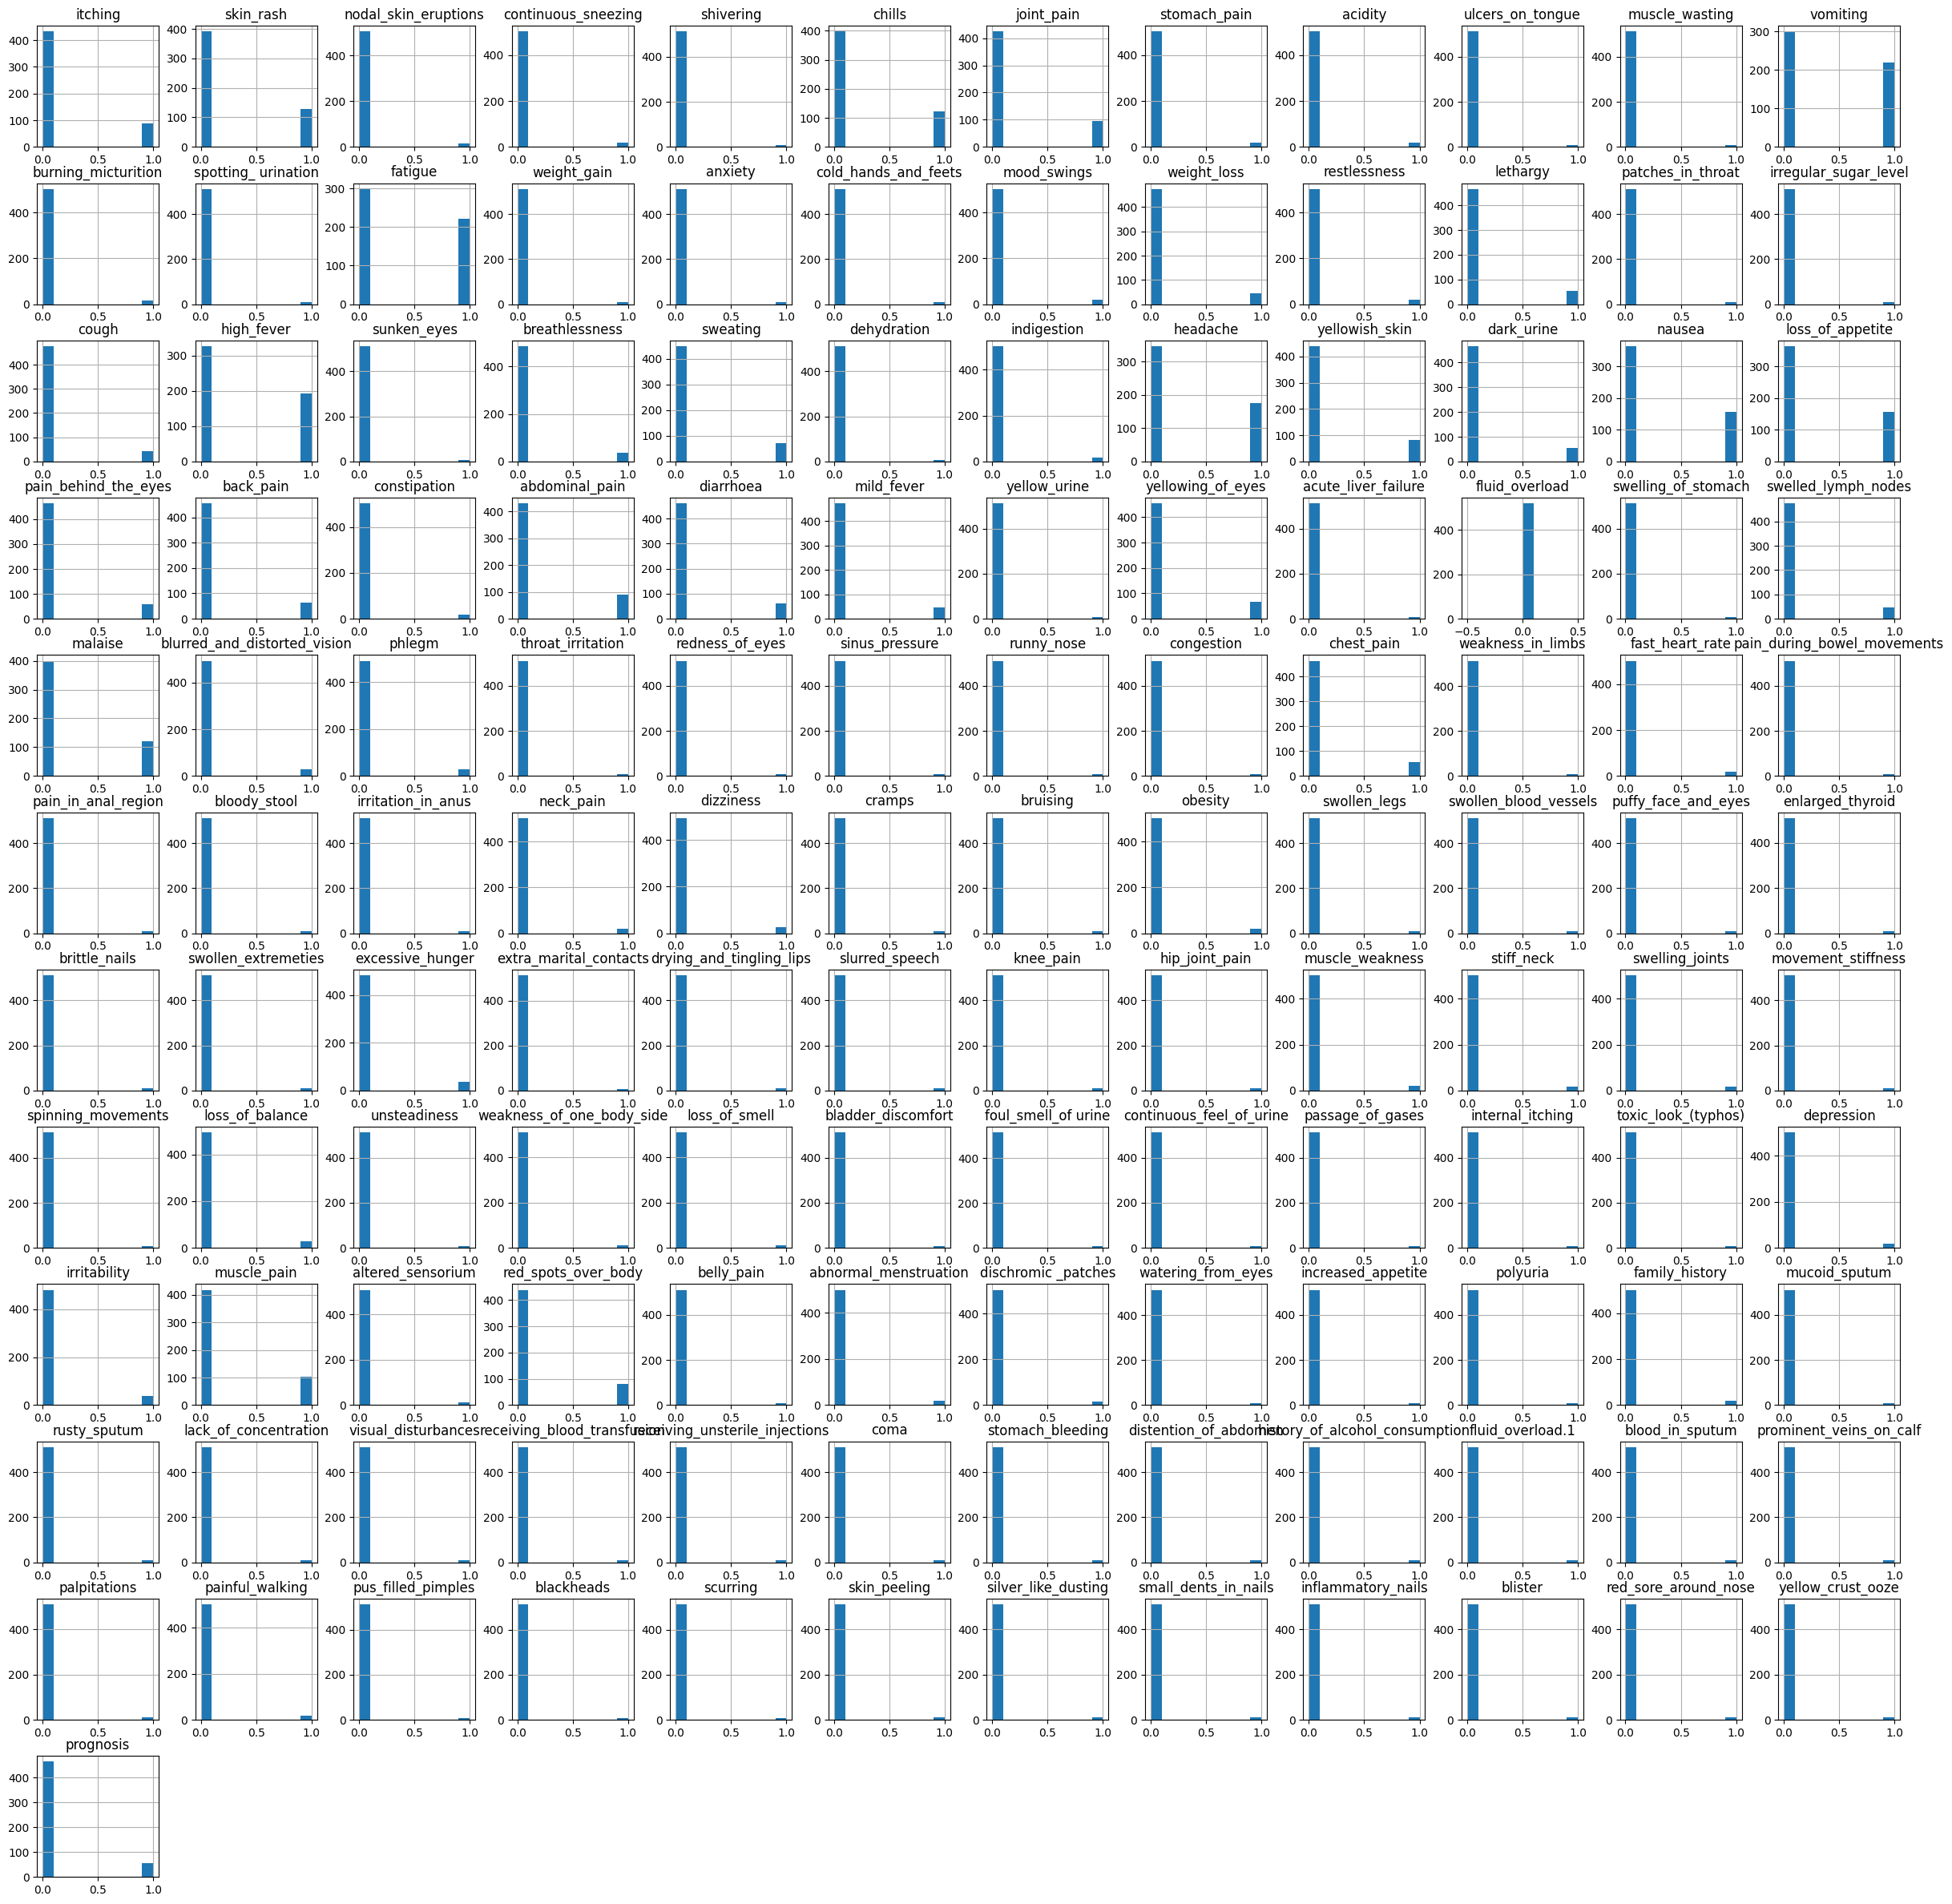

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots_adjust(left=0.1, right=5.9, bottom=.1, top=1.9, wspace=4.4, hspace=4.4)


training_set.hist(bins=10, figsize=(30,30))
plt.show()

In [6]:
print(training_set.dtypes)

itching                 int64
skin_rash               int64
nodal_skin_eruptions    int64
continuous_sneezing     int64
shivering               int64
                        ...  
inflammatory_nails      int64
blister                 int64
red_sore_around_nose    int64
yellow_crust_ooze       int64
prognosis               int64
Length: 133, dtype: object


In [7]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Columns: 133 entries, itching to prognosis
dtypes: int64(133)
memory usage: 540.4 KB


In [8]:
training_set.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [9]:
training_set["prognosis"].value_counts()

prognosis
0    463
1     57
Name: count, dtype: int64

## Explotary Data Analysis (EDA)

In [10]:
### in order to this predict our objective is to predict the dengue is infected or not (classify the dengue infected or not)
    ### what attributes are so important for doing so
    ### to  do that we have to  do corrrelational analysis between the prognosis (dependent variable) (y)and other independent variables(x)

In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [12]:
corr_matrix = training_set.corr()

In [13]:
corr_matrix

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
itching,1.000000,0.251387,0.275974,-0.082974,-0.056417,-0.251221,-0.214759,0.118914,-0.082974,-0.056417,-0.056417,-0.137351,0.127478,0.235284,0.109975,-0.059898,-0.059898,-0.059898,-0.085464,0.152950,-0.085464,0.384358,-0.056417,-0.059898,-0.137222,0.077906,-0.056417,-0.121245,-0.179476,-0.056417,-0.082974,-0.059197,0.258710,0.249858,-0.205933,0.150044,-0.158360,-0.170589,-0.085464,0.224068,-0.163003,0.287020,0.254717,0.089835,-0.059898,NaN,-0.059898,0.292873,0.191023,-0.105623,-0.109688,-0.063200,-0.063200,-0.063200,-0.063200,-0.063200,-0.156796,-0.056417,-0.087894,-0.059898,-0.059898,-0.059898,-0.059898,-0.085464,-0.103543,-0.059898,-0.059898,-0.085464,-0.059898,-0.056417,-0.059898,-0.063200,-0.063200,-0.063200,-0.124918,-0.056417,-0.059898,-0.063200,-0.059898,-0.059898,-0.087894,-0.085464,-0.085464,-0.059898,-0.056417,-0.105623,-0.059898,-0.063200,-0.063200,-0.059898,-0.052722,-0.059898,-0.059898,-0.059898,-0.059898,-0.087894,-0.128517,-0.222952,-0.069368,0.184677,-0.059898,-0.090267,0.275974,-0.056417,-0.063200,-0.063200,-0.085464,-0.059898,-0.063200,-0.059898,-0.059898,0.272907,0.272907,-0.063200,-0.063200,-0.059898,-0.059898,-0.059898,-0.063200,-0.059898,-0.063200,-0.085464,-0.056417,-0.056417,-0.056417,-0.059898,-0.059898,-0.059898,-0.059898,-0.059898,-0.059898,-0.059898,-0.158360
skin_rash,0.251387,1.000000,0.207063,-0.105596,-0.071799,0.151788,0.334931,0.044636,-0.105596,-0.071799,-0.071799,-0.086313,0.052361,0.145267,0.127677,-0.076228,-0.076228,-0.076228,-0.108765,-0.176793,-0.108765,0.154772,-0.071799,-0.076228,-0.174634,0.240746,-0.071799,-0.154301,-0.228409,-0.071799,-0.105596,0.300405,-0.246727,-0.195529,0.119512,0.349660,0.525343,0.469539,-0.108765,-0.264544,-0.207445,0.191633,-0.076228,-0.219003,-0.076228,NaN,-0.076228,0.197390,0.456870,-0.134420,-0.139593,-0.080431,-0.080431,-0.080431,-0.080431,-0.080431,-0.199545,-0.071799,-0.111857,-0.076228,-0.076228,-0.076228,-0.076228,-0.108765,-0.131774

In [14]:
corr_matrix["prognosis"].sort_values(ascending=False)

prognosis                         1.000000
pain_behind_the_eyes              1.000000
back_pain                         0.928316
red_spots_over_body               0.726468
joint_pain                        0.642191
muscle_pain                       0.632779
malaise                           0.567548
chills                            0.543450
nausea                            0.535964
loss_of_appetite                  0.533520
skin_rash                         0.525343
headache                          0.494778
high_fever                        0.367521
vomiting                          0.334971
fatigue                           0.333406
foul_smell_of urine              -0.040986
weakness_in_limbs                -0.043859
spotting_ urination              -0.043859
extra_marital_contacts           -0.043859
muscle_wasting                   -0.043859
ulcers_on_tongue                 -0.043859
dehydration                      -0.043859
watering_from_eyes               -0.043859
sunken_eyes

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='back_pain', ylabel='prognosis'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='prognosis'>,
        <Axes: xlabel='joint_pain', ylabel='prognosis'>,
        <Axes: xlabel='loss_of_appetite', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='back_pain'>,
        <Axes: xlabel='back_pain', ylabel='back_pain'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='back_pain'>,
        <Axes: xlabel='joint_pain', ylabel='back_pain'>,
        <Axes: xlabel='loss_of_appetite', ylabel='back_pain'>],
       [<Axes: xlabel='prognosis', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='back_pain', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='joint_pain', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='loss_of_appetite', ylabel='pain_behind_the_eyes'>],
       [<Axes: xlabel='prognosis', ylabel='jo

<Figure size 640x480 with 0 Axes>

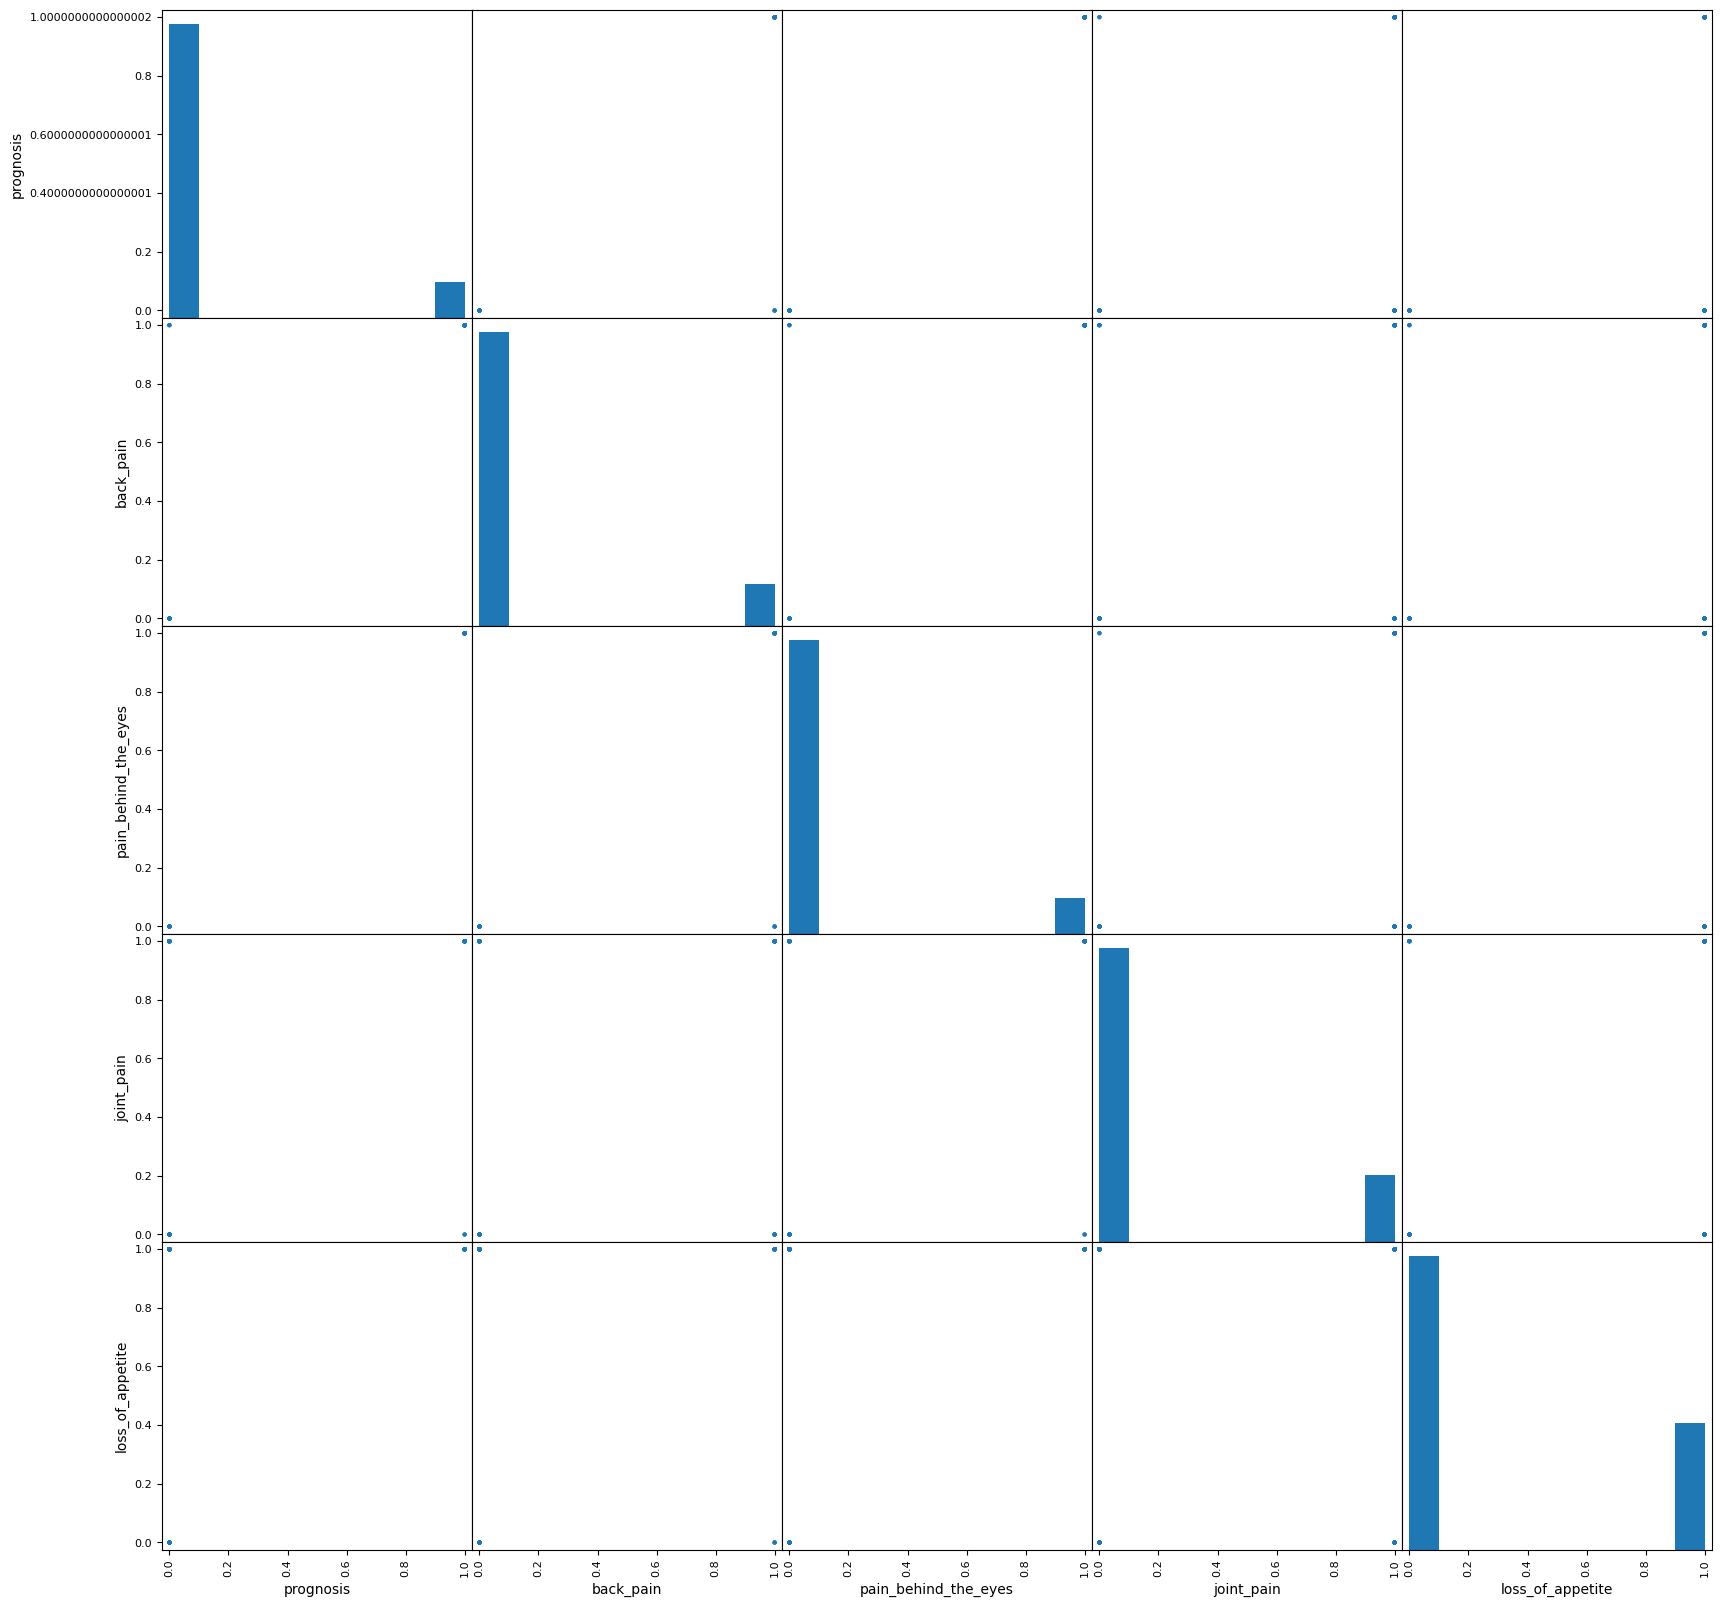

In [15]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","back_pain", "pain_behind_the_eyes","joint_pain","loss_of_appetite"]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='malaise', ylabel='prognosis'>,
        <Axes: xlabel='red_spots_over_body', ylabel='prognosis'>,
        <Axes: xlabel='skin_rash', ylabel='prognosis'>,
        <Axes: xlabel='muscle_pain', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='malaise'>,
        <Axes: xlabel='malaise', ylabel='malaise'>,
        <Axes: xlabel='red_spots_over_body', ylabel='malaise'>,
        <Axes: xlabel='skin_rash', ylabel='malaise'>,
        <Axes: xlabel='muscle_pain', ylabel='malaise'>],
       [<Axes: xlabel='prognosis', ylabel='red_spots_over_body'>,
        <Axes: xlabel='malaise', ylabel='red_spots_over_body'>,
        <Axes: xlabel='red_spots_over_body', ylabel='red_spots_over_body'>,
        <Axes: xlabel='skin_rash', ylabel='red_spots_over_body'>,
        <Axes: xlabel='muscle_pain', ylabel='red_spots_over_body'>],
       [<Axes: xlabel='prognosis', ylabel='skin_rash'>,
        <Axes: xlabel='malaise'

<Figure size 640x480 with 0 Axes>

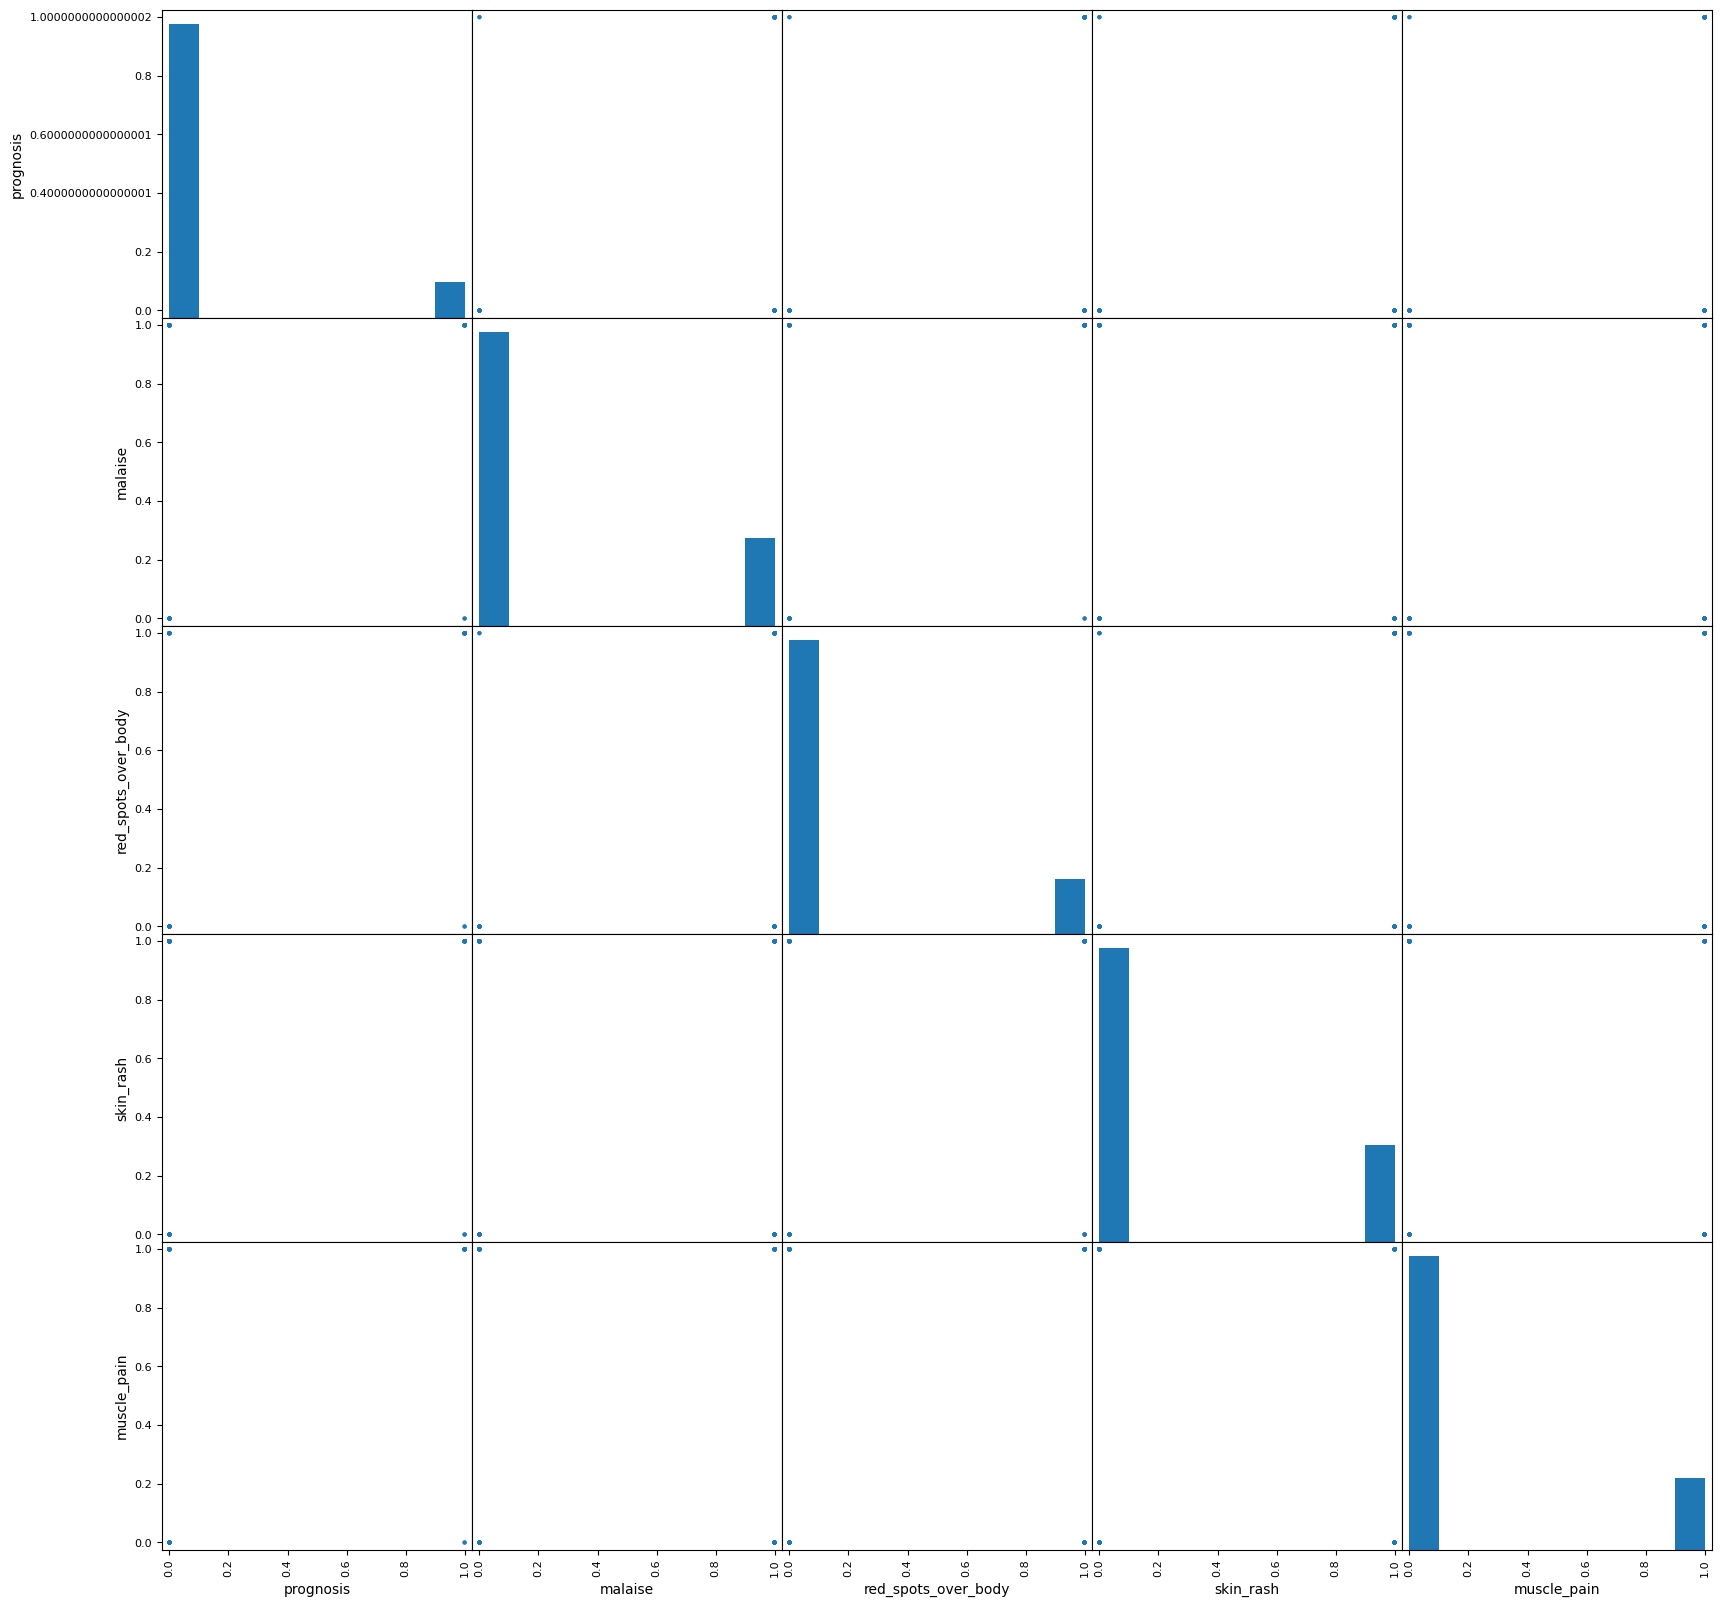

In [16]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","malaise","red_spots_over_body","skin_rash","muscle_pain",]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='fatigue', ylabel='prognosis'>,
        <Axes: xlabel='nausea', ylabel='prognosis'>,
        <Axes: xlabel='headache', ylabel='prognosis'>,
        <Axes: xlabel='vomiting', ylabel='prognosis'>,
        <Axes: xlabel='high_fever', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='fatigue'>,
        <Axes: xlabel='fatigue', ylabel='fatigue'>,
        <Axes: xlabel='nausea', ylabel='fatigue'>,
        <Axes: xlabel='headache', ylabel='fatigue'>,
        <Axes: xlabel='vomiting', ylabel='fatigue'>,
        <Axes: xlabel='high_fever', ylabel='fatigue'>],
       [<Axes: xlabel='prognosis', ylabel='nausea'>,
        <Axes: xlabel='fatigue', ylabel='nausea'>,
        <Axes: xlabel='nausea', ylabel='nausea'>,
        <Axes: xlabel='headache', ylabel='nausea'>,
        <Axes: xlabel='vomiting', ylabel='nausea'>,
        <Axes: xlabel='high_fever', ylabel='nausea'>],
       [<Axes: xlabel='prognosis', yl

<Figure size 640x480 with 0 Axes>

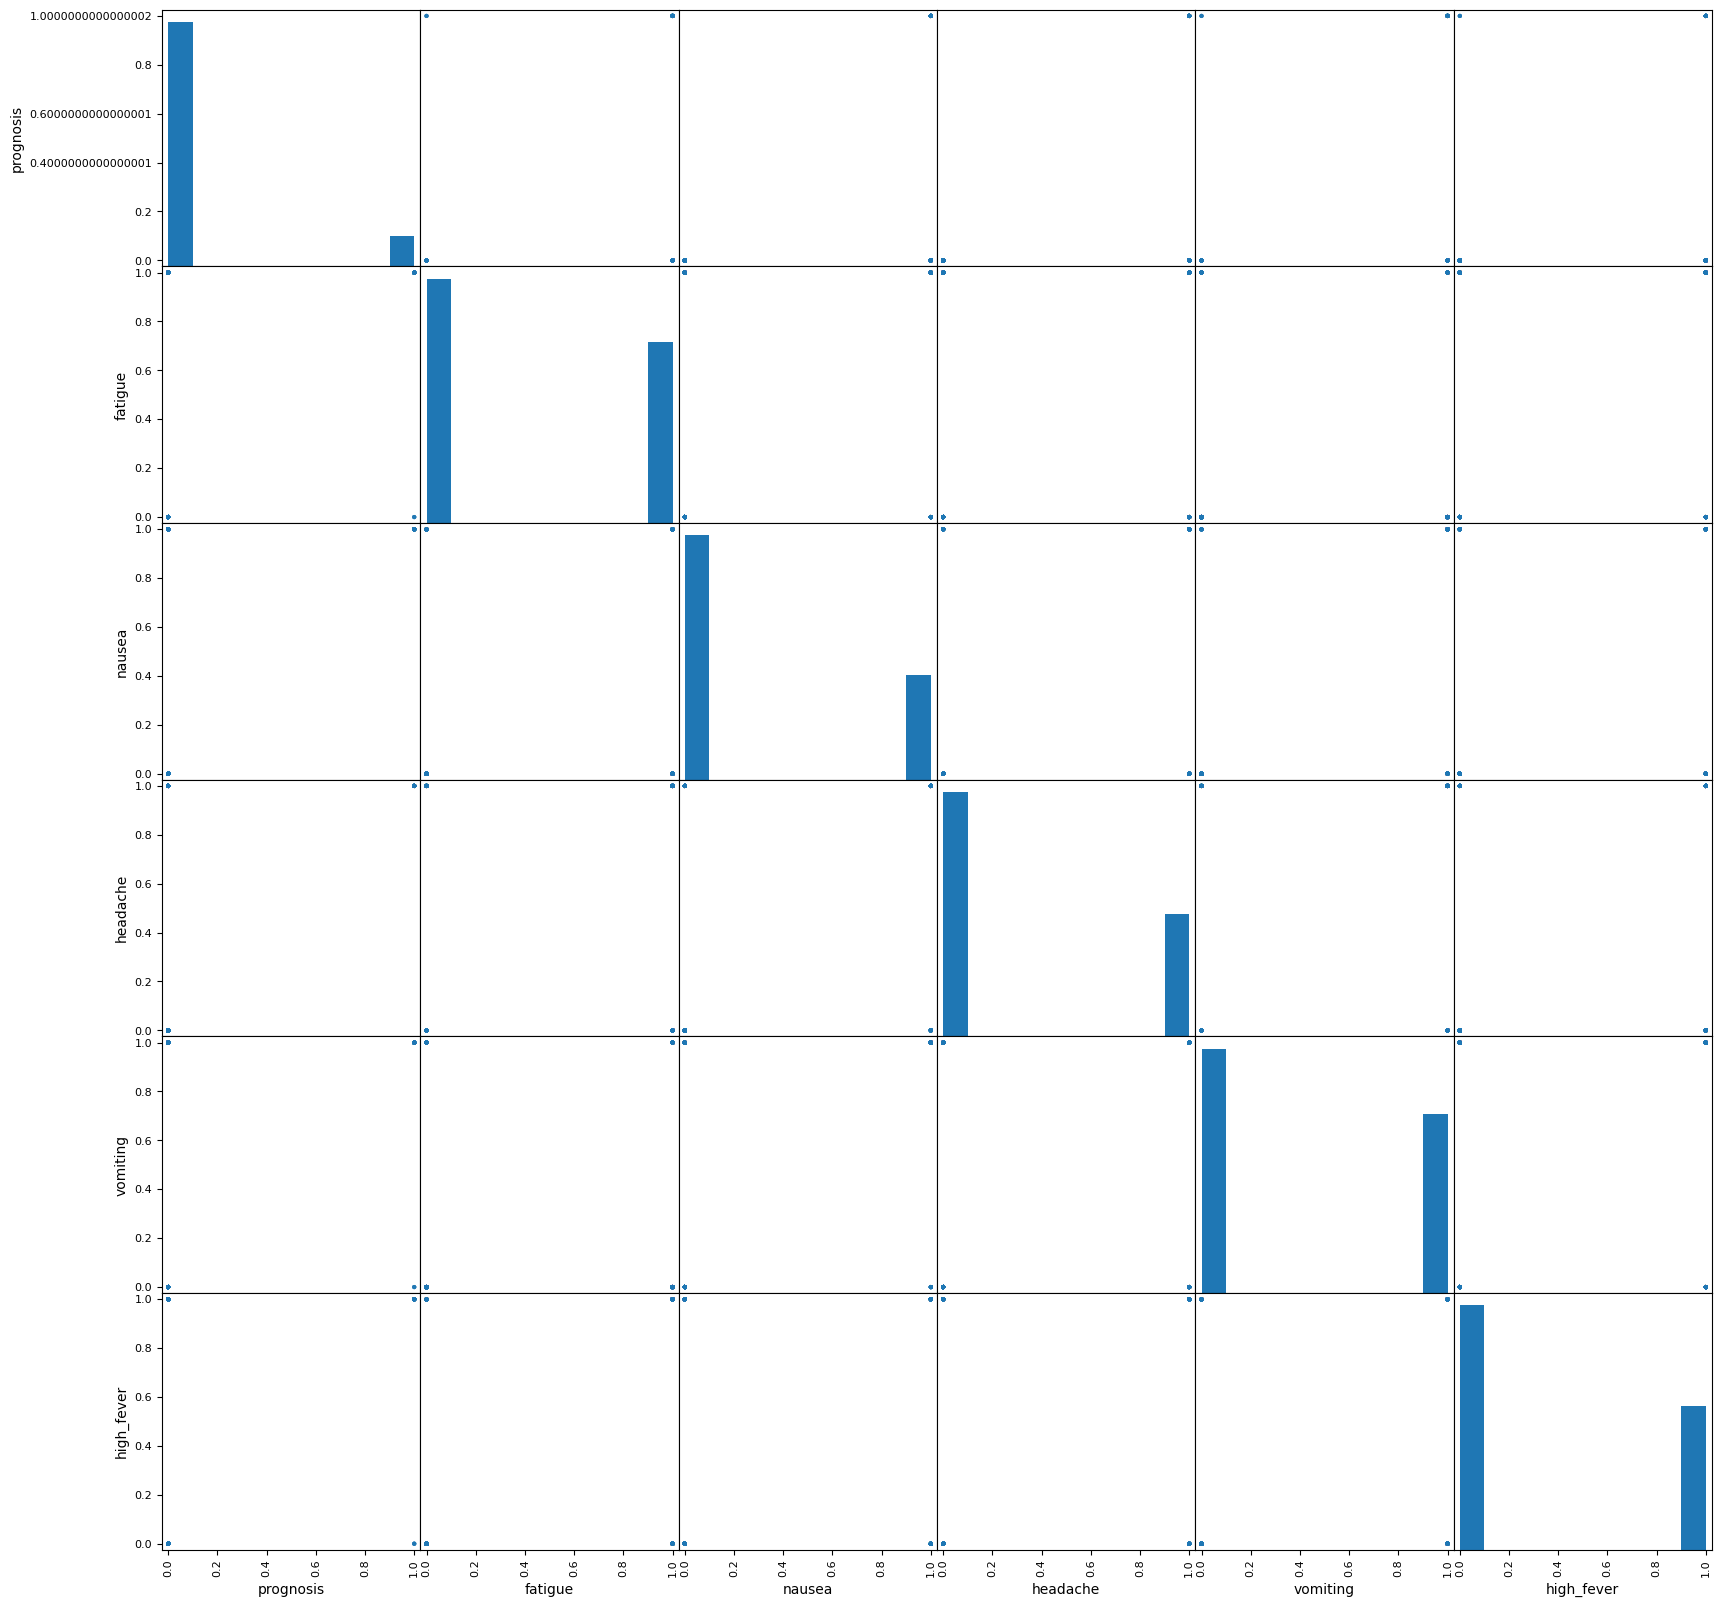

In [17]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","fatigue","nausea","headache","vomiting", "high_fever"]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='toxic_look_(typhos)', ylabel='prognosis'>,
        <Axes: xlabel='abdominal_pain', ylabel='prognosis'>,
        <Axes: xlabel='belly_pain', ylabel='prognosis'>,
        <Axes: xlabel='constipation', ylabel='prognosis'>,
        <Axes: xlabel='sweating', ylabel='prognosis'>,
        <Axes: xlabel='diarrhoea', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='toxic_look_(typhos)', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='abdominal_pain', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='belly_pain', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='constipation', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='sweating', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='diarrhoea', ylabel='toxic_look_(typhos)'>],
       [<Axes: xlabel='prognosis', ylabel='abdominal_pain'>,
        <Axes: xlabel='toxic_look_(typhos)', yl

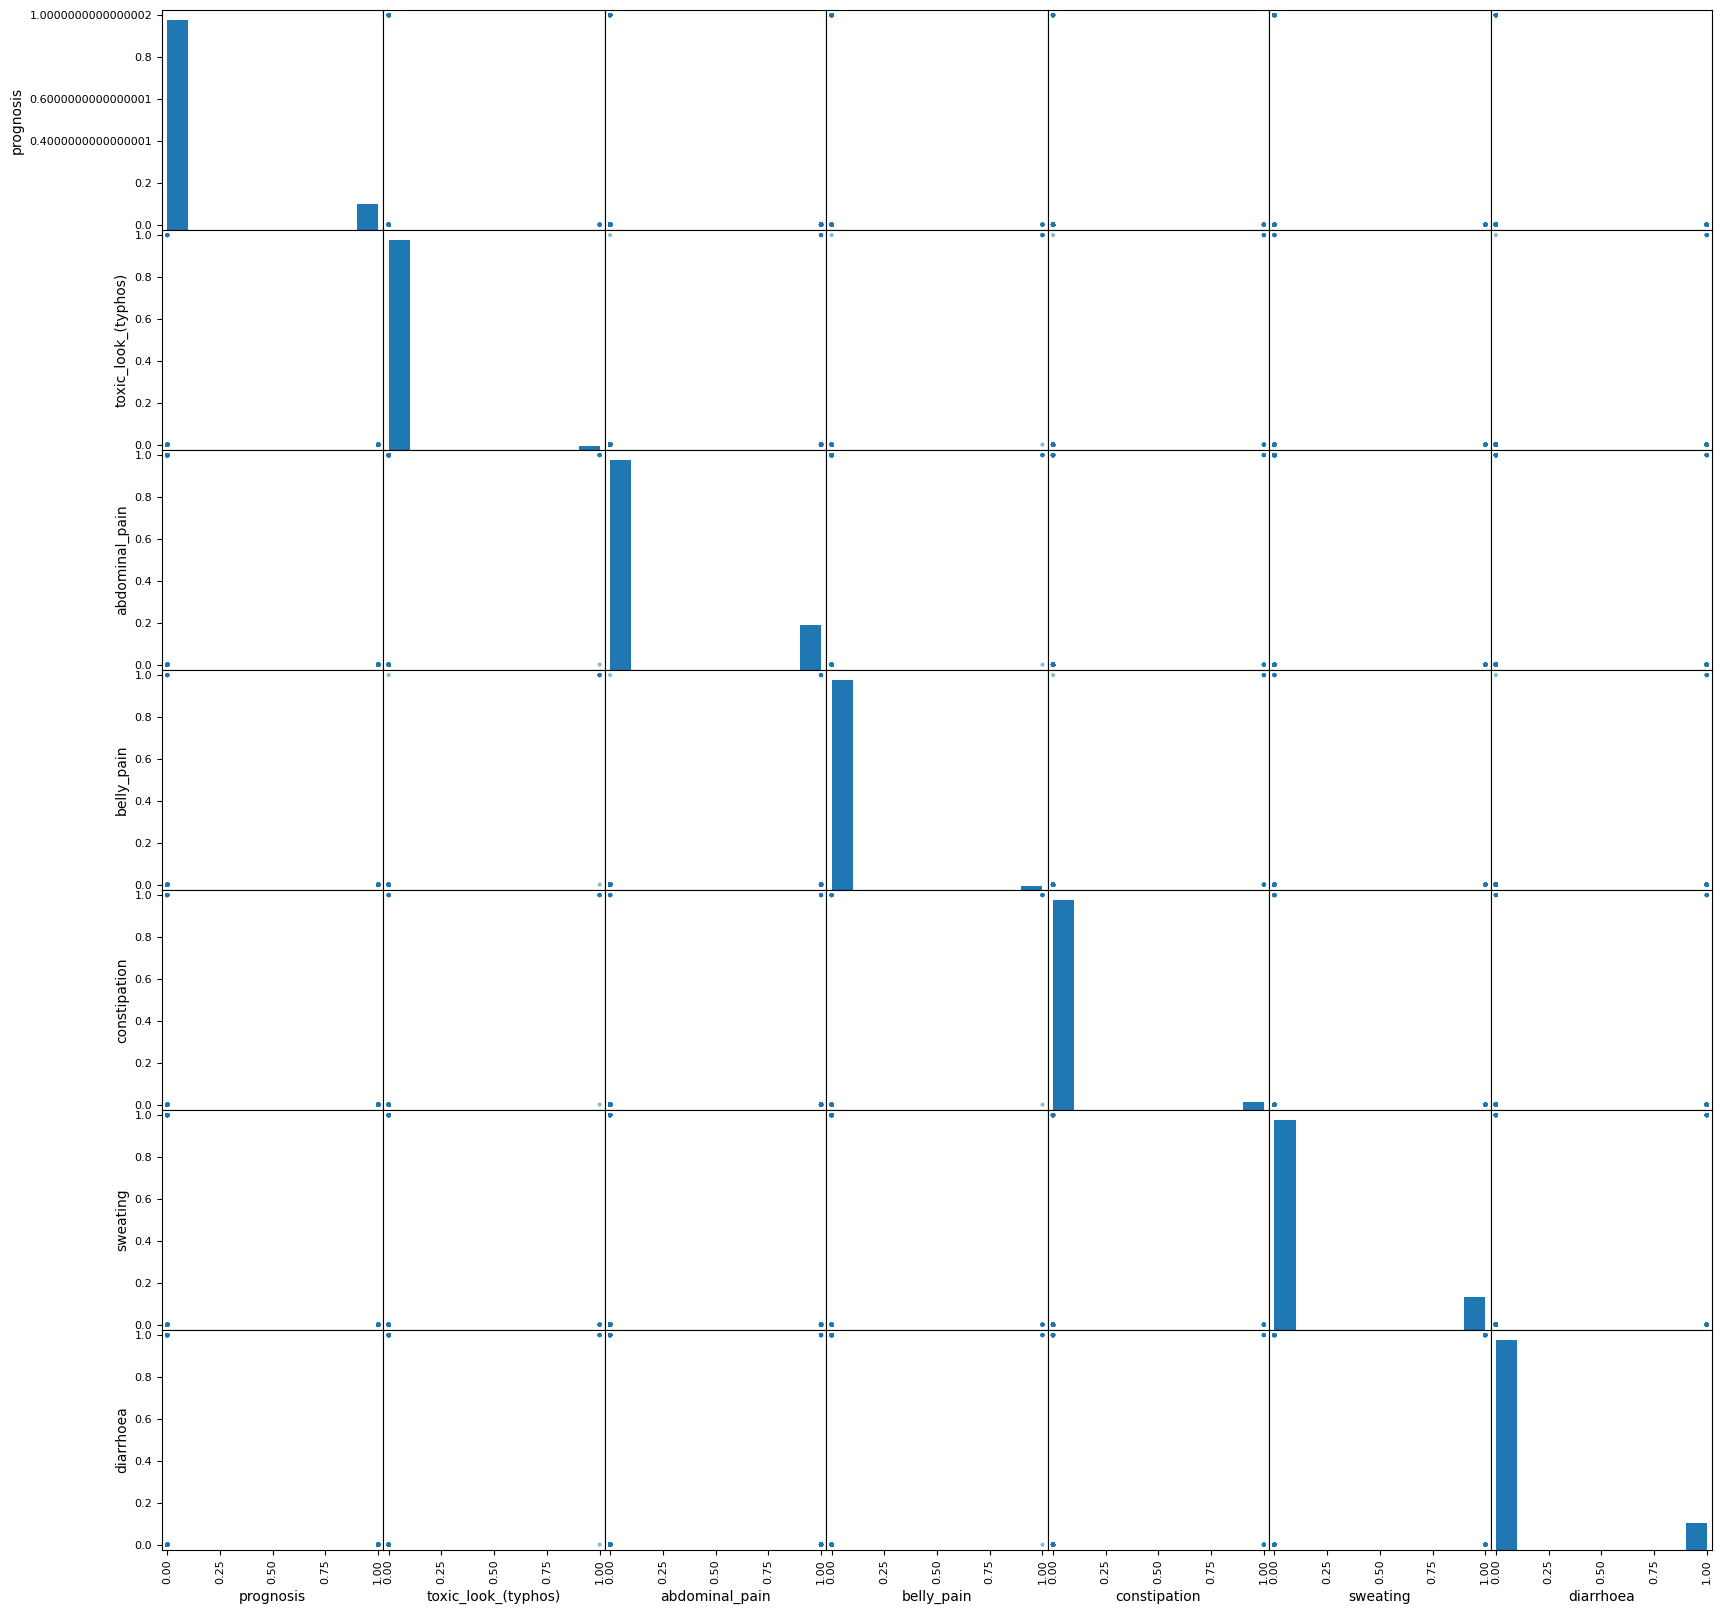

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["prognosis","toxic_look_(typhos)","abdominal_pain","belly_pain", "constipation", "sweating","diarrhoea"]
scatter_matrix(training_set[attributes], figsize=(20,20))

back_pain                         1.000000
pain_behind_the_eyes              1.000000
prognosis                         1.000000
joint_pain                        0.967934
loss_of_appetite                  0.954315
malaise                           0.915901
red_spots_over_body               0.915901
skin_rash                         0.625250
muscle_pain                       0.562421
fatigue                           0.544613
nausea                            0.406694
headache                          0.392534
vomiting                          0.361855
high_fever                        0.337278
toxic_look_(typhos)              -0.267750
abdominal_pain                   -0.267750
belly_pain                       -0.267750
constipation                     -0.267750
sweating                         -0.269251
diarrhoea                        -0.430851

<Axes: xlabel='back_pain', ylabel='prognosis'>

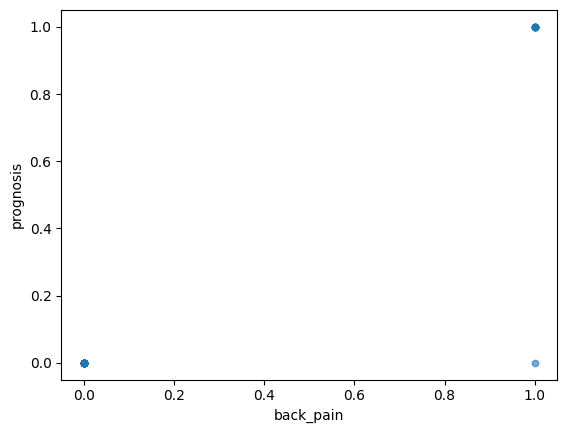

In [19]:
training_set.plot(kind="scatter", x="back_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='pain_behind_the_eyes', ylabel='prognosis'>

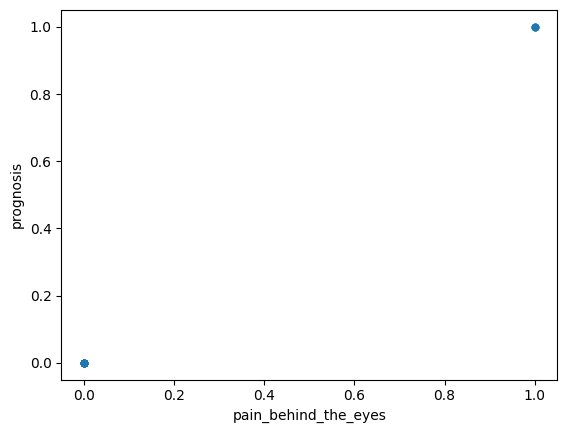

In [20]:
training_set.plot(kind="scatter", x="pain_behind_the_eyes", y="prognosis", alpha=0.1)

<Axes: xlabel='joint_pain', ylabel='prognosis'>

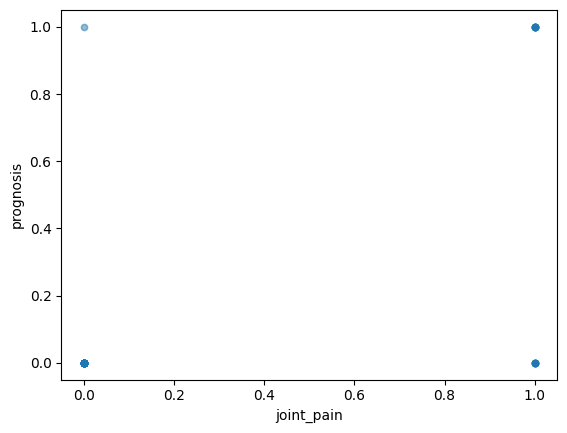

In [21]:
training_set.plot(kind="scatter", x="joint_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='loss_of_appetite', ylabel='prognosis'>

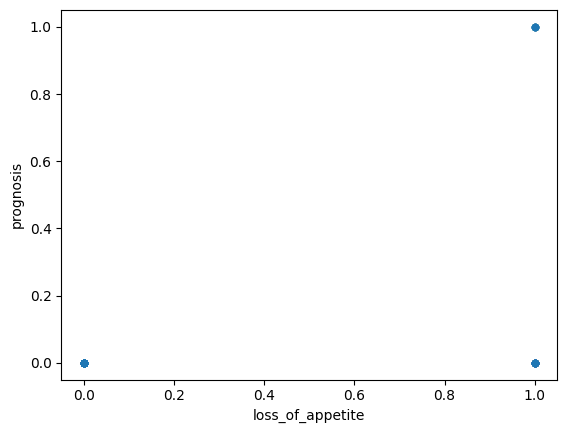

In [22]:
training_set.plot(kind="scatter", x="loss_of_appetite", y="prognosis", alpha=0.1)

<Axes: xlabel='malaise', ylabel='prognosis'>

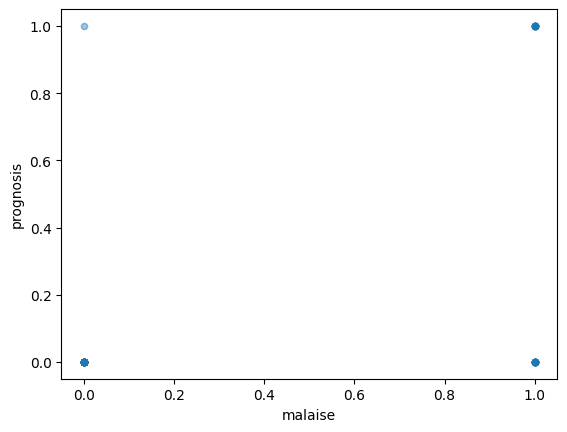

In [23]:
training_set.plot(kind="scatter", x="malaise", y="prognosis", alpha=0.1)

<Axes: xlabel='red_spots_over_body', ylabel='prognosis'>

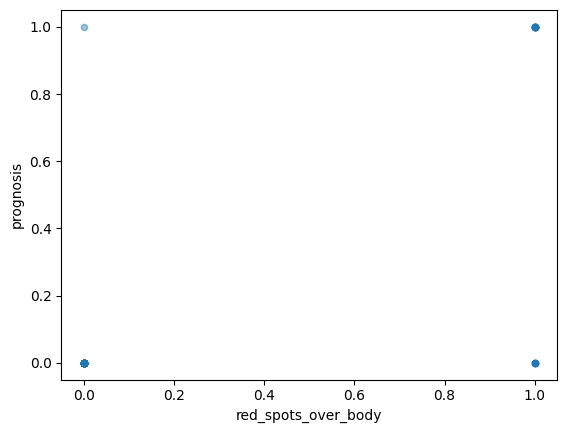

In [24]:
training_set.plot(kind="scatter", x="red_spots_over_body", y="prognosis", alpha=0.1)

<Axes: xlabel='skin_rash', ylabel='prognosis'>

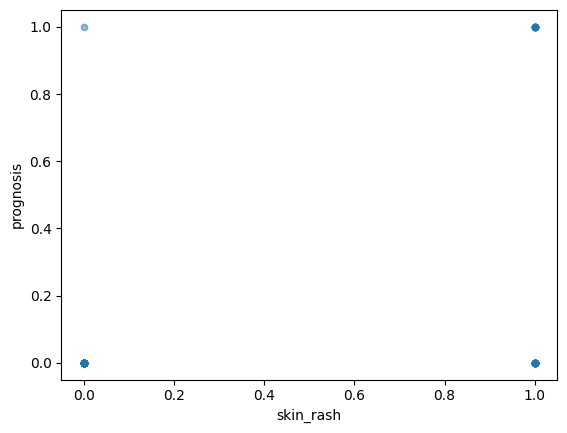

In [25]:
training_set.plot(kind="scatter", x="skin_rash", y="prognosis", alpha=0.1)

<Axes: xlabel='muscle_pain', ylabel='prognosis'>

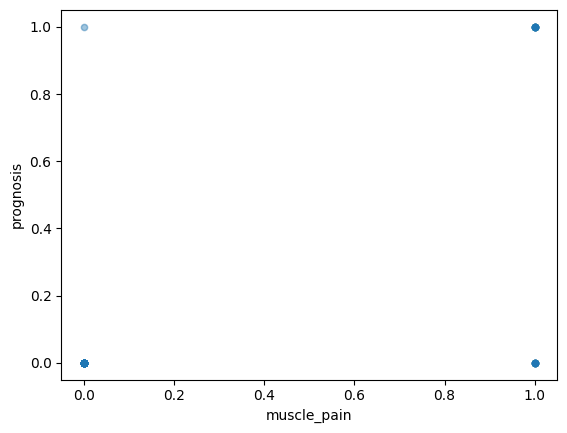

In [26]:
training_set.plot(kind="scatter", x="muscle_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='fatigue', ylabel='prognosis'>

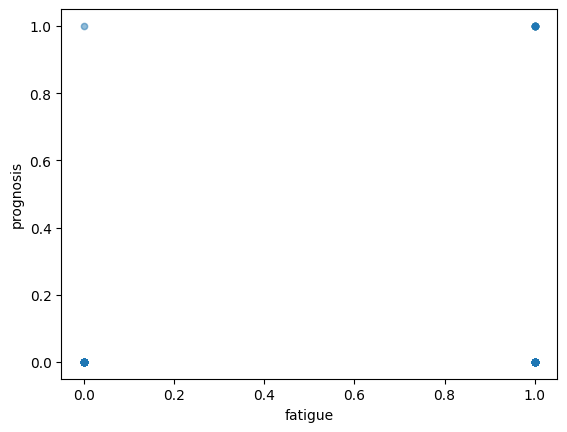

In [27]:
training_set.plot(kind="scatter", x="fatigue", y="prognosis", alpha=0.1)

<Axes: xlabel='nausea', ylabel='prognosis'>

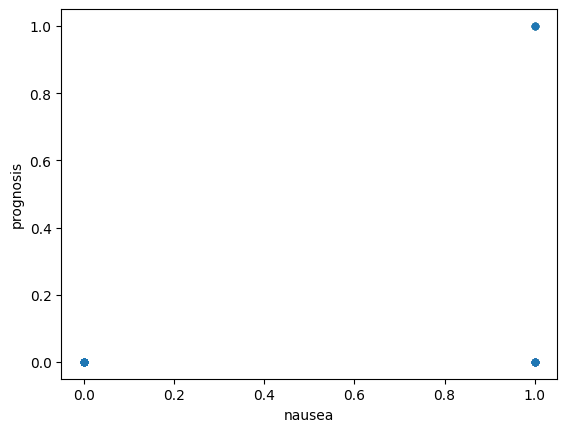

In [28]:
training_set.plot(kind="scatter", x="nausea", y="prognosis", alpha=0.1)

<Axes: xlabel='headache', ylabel='prognosis'>

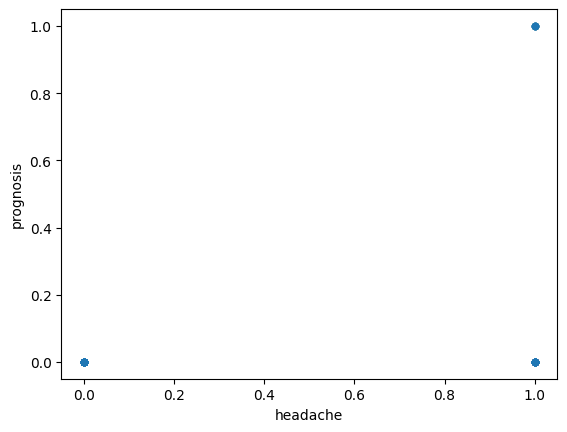

In [29]:
training_set.plot(kind="scatter", x="headache", y="prognosis", alpha=0.1)

vomiting                          0.361855
high_fever                        0.337278
toxic_look_(typhos)              -0.267750
abdominal_pain                   -0.267750
belly_pain                       -0.267750
constipation                     -0.267750
sweating                         -0.269251
diarrhoea                        -0.430851

<Axes: xlabel='vomiting', ylabel='prognosis'>

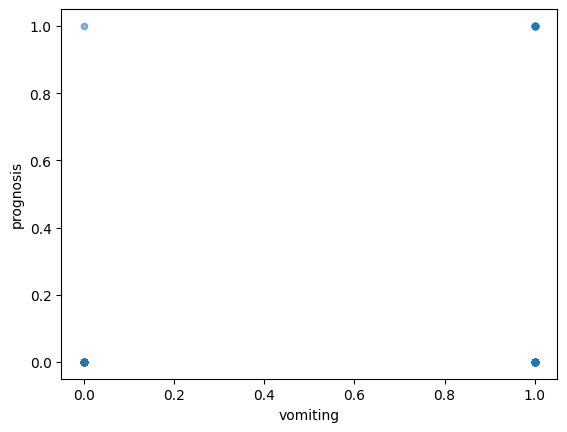

In [30]:
training_set.plot(kind="scatter", x="vomiting", y="prognosis", alpha=0.1)

<Axes: xlabel='high_fever', ylabel='prognosis'>

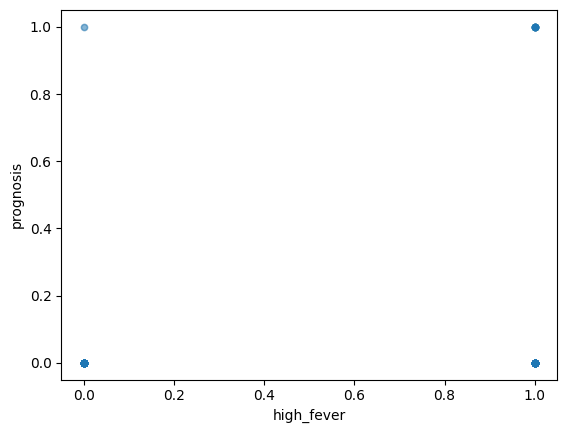

In [31]:
training_set.plot(kind="scatter", x="high_fever", y="prognosis", alpha=0.1)

<Axes: xlabel='toxic_look_(typhos)', ylabel='prognosis'>

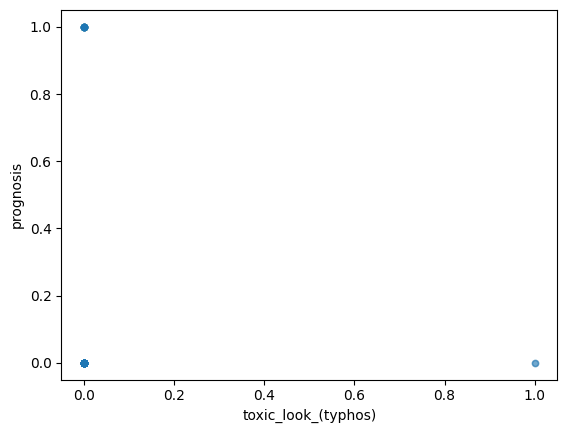

In [32]:
training_set.plot(kind="scatter", x="toxic_look_(typhos)", y="prognosis", alpha=0.1)

<Axes: xlabel='abdominal_pain', ylabel='prognosis'>

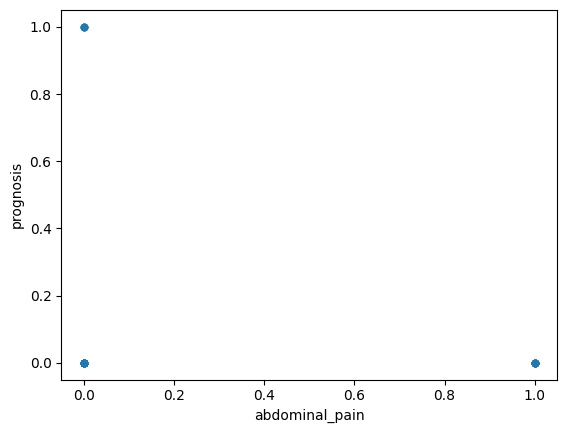

In [33]:
training_set.plot(kind="scatter", x="abdominal_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='belly_pain', ylabel='prognosis'>

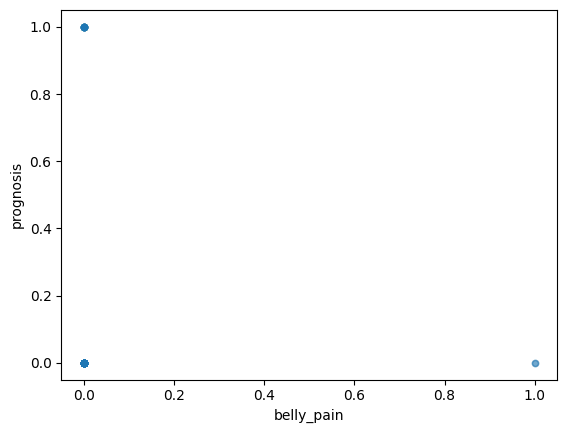

In [34]:
training_set.plot(kind="scatter", x="belly_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='constipation', ylabel='prognosis'>

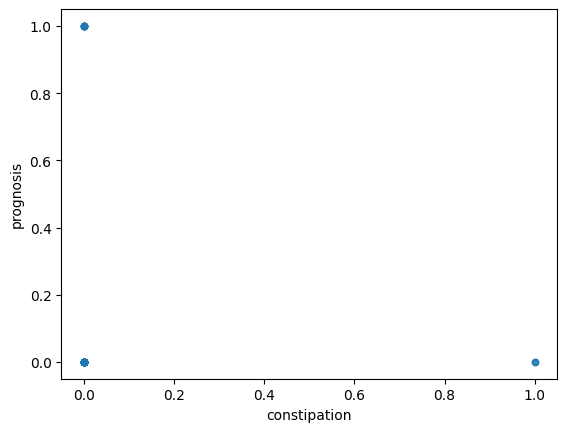

In [35]:
training_set.plot(kind="scatter", x="constipation", y="prognosis", alpha=0.1)

<Axes: xlabel='sweating', ylabel='prognosis'>

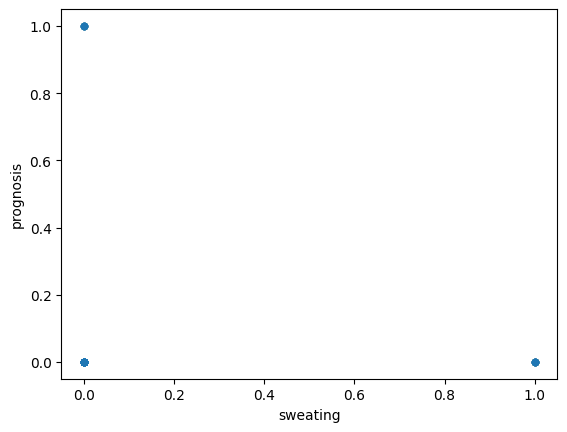

In [36]:
training_set.plot(kind="scatter", x="sweating", y="prognosis", alpha=0.1)

<Axes: xlabel='diarrhoea', ylabel='prognosis'>

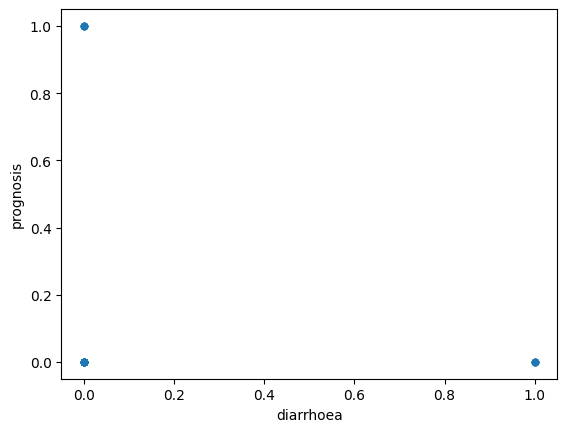

In [37]:
training_set.plot(kind="scatter", x="diarrhoea", y="prognosis", alpha=0.1)                                             

## Preparing the DataSet ML for (Machine Learning) Models

In [38]:
training_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
## our objective is predict dengue. in that case prognosis variable is already available. so then we can use the supervised learning method
 ## seperate the label and rest of the data

In [40]:
training_set_data = training_set.drop("prognosis", axis=1)

training_set_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
training_set_data_label = training_set["prognosis"].copy()
training_set_data_label

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [42]:
training_set_data_label.isnull().sum()

0

In [43]:
## Data Cleaning

In [44]:
### check  any particular missing values are there

In [45]:
training_set_data.isnull().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

In [46]:
### According to the above dataset missing values are not there then we dont need filling the missing values

In [47]:
## Feature Scalling
 #- ML algorthms doent work well when features are in the different scale
 #- So the feature scale is required
 # there are two main way is avaiable to do the scalling
    # min-max scaling
    # standardization

In [48]:
## min-max scalling

## normalized value = (x-min_value)/(max_value)

In [49]:
## standardization

 ## std_val = (x-mean)/standared deviation

In [50]:
# std_val always has o means
# std_val has unit variation

In [51]:
training_set_data.isnull().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

In [52]:
from sklearn.model_selection import train_test_split


label= training_set_data_label.copy()

# Splitting train set into  the trainning and validation set
X_train, X_test, y_train, y_test = train_test_split(training_set_data, label, test_size = 0.2, random_state=42)

In [53]:
 #Import models
from sklearn.tree import DecisionTreeClassifier
Dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
Dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [54]:

Dt_value_predictions = Dt_clf.predict(X_test)
Dt_value_accuracy = accuracy_score(y_test, Dt_value_predictions)
print(f"\nValidation Accuracy: {Dt_value_accuracy:.4f}")


Validation Accuracy: 1.0000


In [55]:
# Performance Measure Of Your Model

In [56]:

#mse_Of_Dt = mean_squared_error(y_test, Dt_value_predictions)
#print(f"Mean Squared Error (MSE): {mse_Of_Dt:.4f}")

In [57]:
#from sklearn.ensemble import RandomForestClassifier
#Rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)
#Rf_clf.fit(X_train, y_train)

In [58]:
#Rf_value_predictions = Rf_clf.predict(X_test)
#Rf_value_accuracy = accuracy_score(y_test, Rf_value_predictions)
#print(f"\nValidation Accuracy: {Rf_value_accuracy:.4f}")

In [59]:
# Performance Mesure Of Your Model

In [60]:
#mse_Of_Rf = mean_squared_error(y_test, Rf_value_predictions)
#print(f"Mean Squared Error (MSE): {mse_Of_Rf:.4f}")

In [61]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(penalty='l2', solver='liblinear',random_state=42)
LR_clf.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [62]:
Lr_value_predictions = LR_clf.predict(X_test)
Lr_value_accuracy = accuracy_score(y_test, Lr_value_predictions)
print(f"\nValidation Accuracy: {Lr_value_accuracy:.4f}")


Validation Accuracy: 1.0000


In [63]:
# Performance Mesure Of Your Model

In [64]:
#mse_Of_Lr = mean_squared_error(y_test, Lr_value_predictions)
#print(f"Mean Squared Error (MSE): {mse_Of_Lr:.4f}")

## Handle the overfitting issue

In [65]:

corr_matrix["prognosis"].sort_values(ascending=False)

prognosis                         1.000000
pain_behind_the_eyes              1.000000
back_pain                         0.928316
red_spots_over_body               0.726468
joint_pain                        0.642191
muscle_pain                       0.632779
malaise                           0.567548
chills                            0.543450
nausea                            0.535964
loss_of_appetite                  0.533520
skin_rash                         0.525343
headache                          0.494778
high_fever                        0.367521
vomiting                          0.334971
fatigue                           0.333406
foul_smell_of urine              -0.040986
weakness_in_limbs                -0.043859
spotting_ urination              -0.043859
extra_marital_contacts           -0.043859
muscle_wasting                   -0.043859
ulcers_on_tongue                 -0.043859
dehydration                      -0.043859
watering_from_eyes               -0.043859
sunken_eyes

In [66]:
columns_to_drop = ['itching', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'burning_micturition', 'spotting_ urination', 'weight_gain', 'anxiety', 'cold_hands_and_feets',                 
                  'mood_swings', 'weight_loss', 'restlessness', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'sunken_eyes', 'breathlessness', 'dehydration', 'indigestion', 'yellowish_skin',                         
                  'dark_urine', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region',
                  'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails',                         
                  'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
                  'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases',                       
                  'internal_itching', 'depression', 'irritability', 'altered_sensorium', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration',
                  'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum',                        
                  'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister',                                
                  'red_sore_around_nose', 'yellow_crust_ooze']


training_set_data.drop(columns=columns_to_drop, inplace=True)



In [67]:
training_prepared_data_new_pd=training_set_data
training_prepared_data_new_pd.head(10)

,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,vomiting,fatigue,lethargy,high_fever,sweating,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,swelled_lymph_nodes,malaise,toxic_look_(typhos),muscle_pain,red_spots_over_body,belly_pain,dischromic _patches,watering_from_eyes
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [68]:
training_prepared_data_new_pd.head(5)

,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,vomiting,fatigue,lethargy,high_fever,sweating,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,swelled_lymph_nodes,malaise,toxic_look_(typhos),muscle_pain,red_spots_over_body,belly_pain,dischromic _patches,watering_from_eyes
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
training_prepared_data_new_pd.to_csv("training_new_dataset.csv", index=False)
print("training dataset file saved successfully.")

training dataset file saved successfully.


In [70]:
training_new_dataset_pd=pd.read_csv("training_new_dataset.csv")

In [71]:
training_new_dataset_pd.head(40)

,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,vomiting,fatigue,lethargy,high_fever,sweating,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,swelled_lymph_nodes,malaise,toxic_look_(typhos),muscle_pain,red_spots_over_body,belly_pain,dischromic _patches,watering_from_eyes
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [72]:
training_new_dataset_pd.isnull().sum()

skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
chills                  0
joint_pain              0
vomiting                0
fatigue                 0
lethargy                0
high_fever              0
sweating                0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
constipation            0
abdominal_pain          0
diarrhoea               0
mild_fever              0
swelled_lymph_nodes     0
malaise                 0
toxic_look_(typhos)     0
muscle_pain             0
red_spots_over_body     0
belly_pain              0
dischromic _patches     0
watering_from_eyes      0
dtype: int64

In [73]:
from sklearn.model_selection import train_test_split


label= training_set_data_label.copy()

# Splitting train set into  the trainning and validation set
X_train, X_test, y_train, y_test = train_test_split(training_new_dataset_pd, label, test_size = 0.2, random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()


logreg_model.fit(X_train, y_train)

LogisticRegression()

In [75]:
logreg_model_value_predictions =logreg_model.predict(X_test)
logreg_model_value_accuracy = accuracy_score(y_test, logreg_model_value_predictions)
print(f"\nValidation Accuracy: {logreg_model_value_accuracy:.4f}")


Validation Accuracy: 1.0000


In [76]:
# Import models
#from sklearn.tree import DecisionTreeClassifier
#Dt_clf = DecisionTreeClassifier(random_state=42)
#Dt_clf.fit(X_train, y_train)

In [77]:
#Dt_value_predictions = Dt_clf.predict(X_test)
#Dt_value_accuracy = accuracy_score(y_test, Dt_value_predictions)
#print(f"\nValidation Accuracy: {Dt_value_accuracy:.4f}")

In [78]:
#from sklearn.ensemble import RandomForestClassifier
#Rf_clf = RandomForestClassifier(random_state=42)
#Rf_clf.fit(X_train, y_train)

In [79]:
#Rf_value_predictions = Rf_clf.predict(X_test)
#Rf_value_accuracy = accuracy_score(y_test, Rf_value_predictions)
#print(f"\nValidation Accuracy: {Rf_value_accuracy:.4f}")

In [80]:
import numpy as np
np.size(training_prepared_data_new_pd)

14560

# Hyper Parameter Tuning

In [81]:
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier
#from sklearn.metrics import accuracy_score

# Assuming your dataset is loaded into 'data'


# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(training_new_dataset_pd, label, test_size=0.2, random_state=42)

# Instantiate the XGBoost model
#xgb_model = XGBClassifier()

# Fit the model on the training data
#xgb_model.fit(X_train, y_train)

# Predictions on the test set
#test_set_predictions = xgb_model.predict(X_test)

# Evaluate model performance
#accuracy = accuracy_score(y_test, test_set_predictions)
#print("Accuracy:", accuracy)


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(training_new_dataset_pd, label, test_size=0.2, random_state=42)

# Instantiate the SVM model
# Instantiate the SVM model with a non-linear kernel (e.g., 'rbf')
svm_model = SVC(kernel='rbf', C=1.0)  # 'rbf' kernel, C=1.0

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predictions on the test set
test_set_predictions = svm_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, test_set_predictions)
print("Accuracy:", accuracy)

# Predictions on the test set
test_set_predictions = svm_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, test_set_predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0
Accuracy: 1.0


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate a synthetic dataset with 2 informative features
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(training_new_dataset_pd, label, test_size=0.2, random_state=42)

# Instantiate logistic regression model with high regularization
logreg_model = LogisticRegression(C=0.001)  # High regularization

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predictions on the test set
test_set_predictions = logreg_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, test_set_predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8653846153846154


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.utils import shuffle


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(training_new_dataset_pd, label, test_size=0.2, random_state=42)
# Decision Tree Classifier with Regularization (Pruning)
dt_clf = DecisionTreeClassifier(max_depth=15000, min_samples_split=15000, random_state=42)

# Random Forest Classifier with Regularization (Reducing tree depth)
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_split=400, random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term
    'solver': ['liblinear']  # Algorithm to use in the optimization problem
}

# Instantiate logistic regression model
X_train, _, y_train, _ = train_test_split(training_new_dataset_pd, label, test_size=0.9, random_state=42)

# Introduce noise to data
X_noisy = training_new_dataset_pd+ pd.DataFrame(np.random.normal(0, 0.1, training_new_dataset_pd.shape), columns=training_new_dataset_pd.columns)

# Shuffle the data
X_shuffled, y_shuffled = shuffle(training_new_dataset_pd, label, random_state=42)

# Instantiate logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the noisy or shuffled data
logreg_model.fit(X_noisy, label)
# logreg_model.fit(X_shuffled, y_shuffled)

# Predictions on the entire dataset
predictions = logreg_model.predict(training_new_dataset_pd)
accuracy = accuracy_score(label, predictions)
print("Accuracy:", accuracy)
# Train and evaluate models on the training set
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Predictions on the test set
dt_test_pred = dt_clf.predict(X_test)
rf_test_pred = rf_clf.predict(X_test)

# Model Evaluation
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
rt_test_accuracy = accuracy_score(y_test, rf_test_pred)


# Calculate MSE and RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, rf_test_pred)
rmse_dt = np.sqrt(mse_dt)

# Calculate MSE and RMSE for Random Forest
mse_rf = mean_squared_error(y_test, rf_test_pred)
rmse_rf = np.sqrt(mse_rf)

# Print Results
print("Decision Tree Validation Accuracy:", dt_test_accuracy)
print("Random Forest Validation Accuracy:", rt_test_accuracy)
print(f"Decision Tree Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"Decision Tree Root Mean Squared Error (RMSE): {rmse_dt:.4f}")
print(f"Random Forest Mean Squared Error (MSE): {mse_rf:.4f}")



Accuracy: 1.0
Decision Tree Validation Accuracy: 0.8653846153846154
Random Forest Validation Accuracy: 0.8653846153846154
Decision Tree Mean Squared Error (MSE): 0.1346
Decision Tree Root Mean Squared Error (RMSE): 0.3669
Random Forest Mean Squared Error (MSE): 0.1346


# Cross validation 

In [85]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print mean cross-validation score
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.81818182 0.81818182 0.9        0.8        0.8       ]
Mean Cross-Validation Score: 0.8272727272727274


In [86]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_clf,X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print mean cross-validation score
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.81818182 0.81818182 0.9        0.8        0.8       ]
Mean Cross-Validation Score: 0.8272727272727274


# Model Evaluation

In [87]:
def modelEvaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Return accuracy for later use
    return accuracy
    

# Now you can use the evaluate function with your models
print("DT")
DT_accuracy = modelEvaluation(dt_clf, X_test, y_test)

print("RF")
Rf_accuracy = modelEvaluation(rf_clf, X_test, y_test)

# Now you have the accuracy scores stored in variables for later use
print(f"DT Accuracy: {DT_accuracy:.4f}")
print(f"RF Accuracy: {Rf_accuracy:.4f}")


DT
Accuracy: 0.8654
Precision: 0.7489
Recall: 0.8654
F1 Score: 0.8029

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        90
           1       0.00      0.00      0.00        14

    accuracy                           0.87       104
   macro avg       0.43      0.50      0.46       104
weighted avg       0.75      0.87      0.80       104


Confusion Matrix:
[[90  0]
 [14  0]]
RF
Accuracy: 0.8654
Precision: 0.7489
Recall: 0.8654
F1 Score: 0.8029

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        90
           1       0.00      0.00      0.00        14

    accuracy                           0.87       104
   macro avg       0.43      0.50      0.46       104
weighted avg       0.75      0.87      0.80       104


Confusion Matrix:
[[90  0]
 [14  0]]
DT Accuracy: 0.8654
RF Accuracy: 0.8654


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [88]:
# Selecting best model
# Accuracy random forest - 79 , decision tree - 79, 
# we can select the both models  but most prefered algorithm is random forest algorithm/model


## Clean the test set for predictions

In [89]:
test_data =pd.read_csv("Testing10.csv")

In [90]:
test_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

<Figure size 640x480 with 0 Axes>

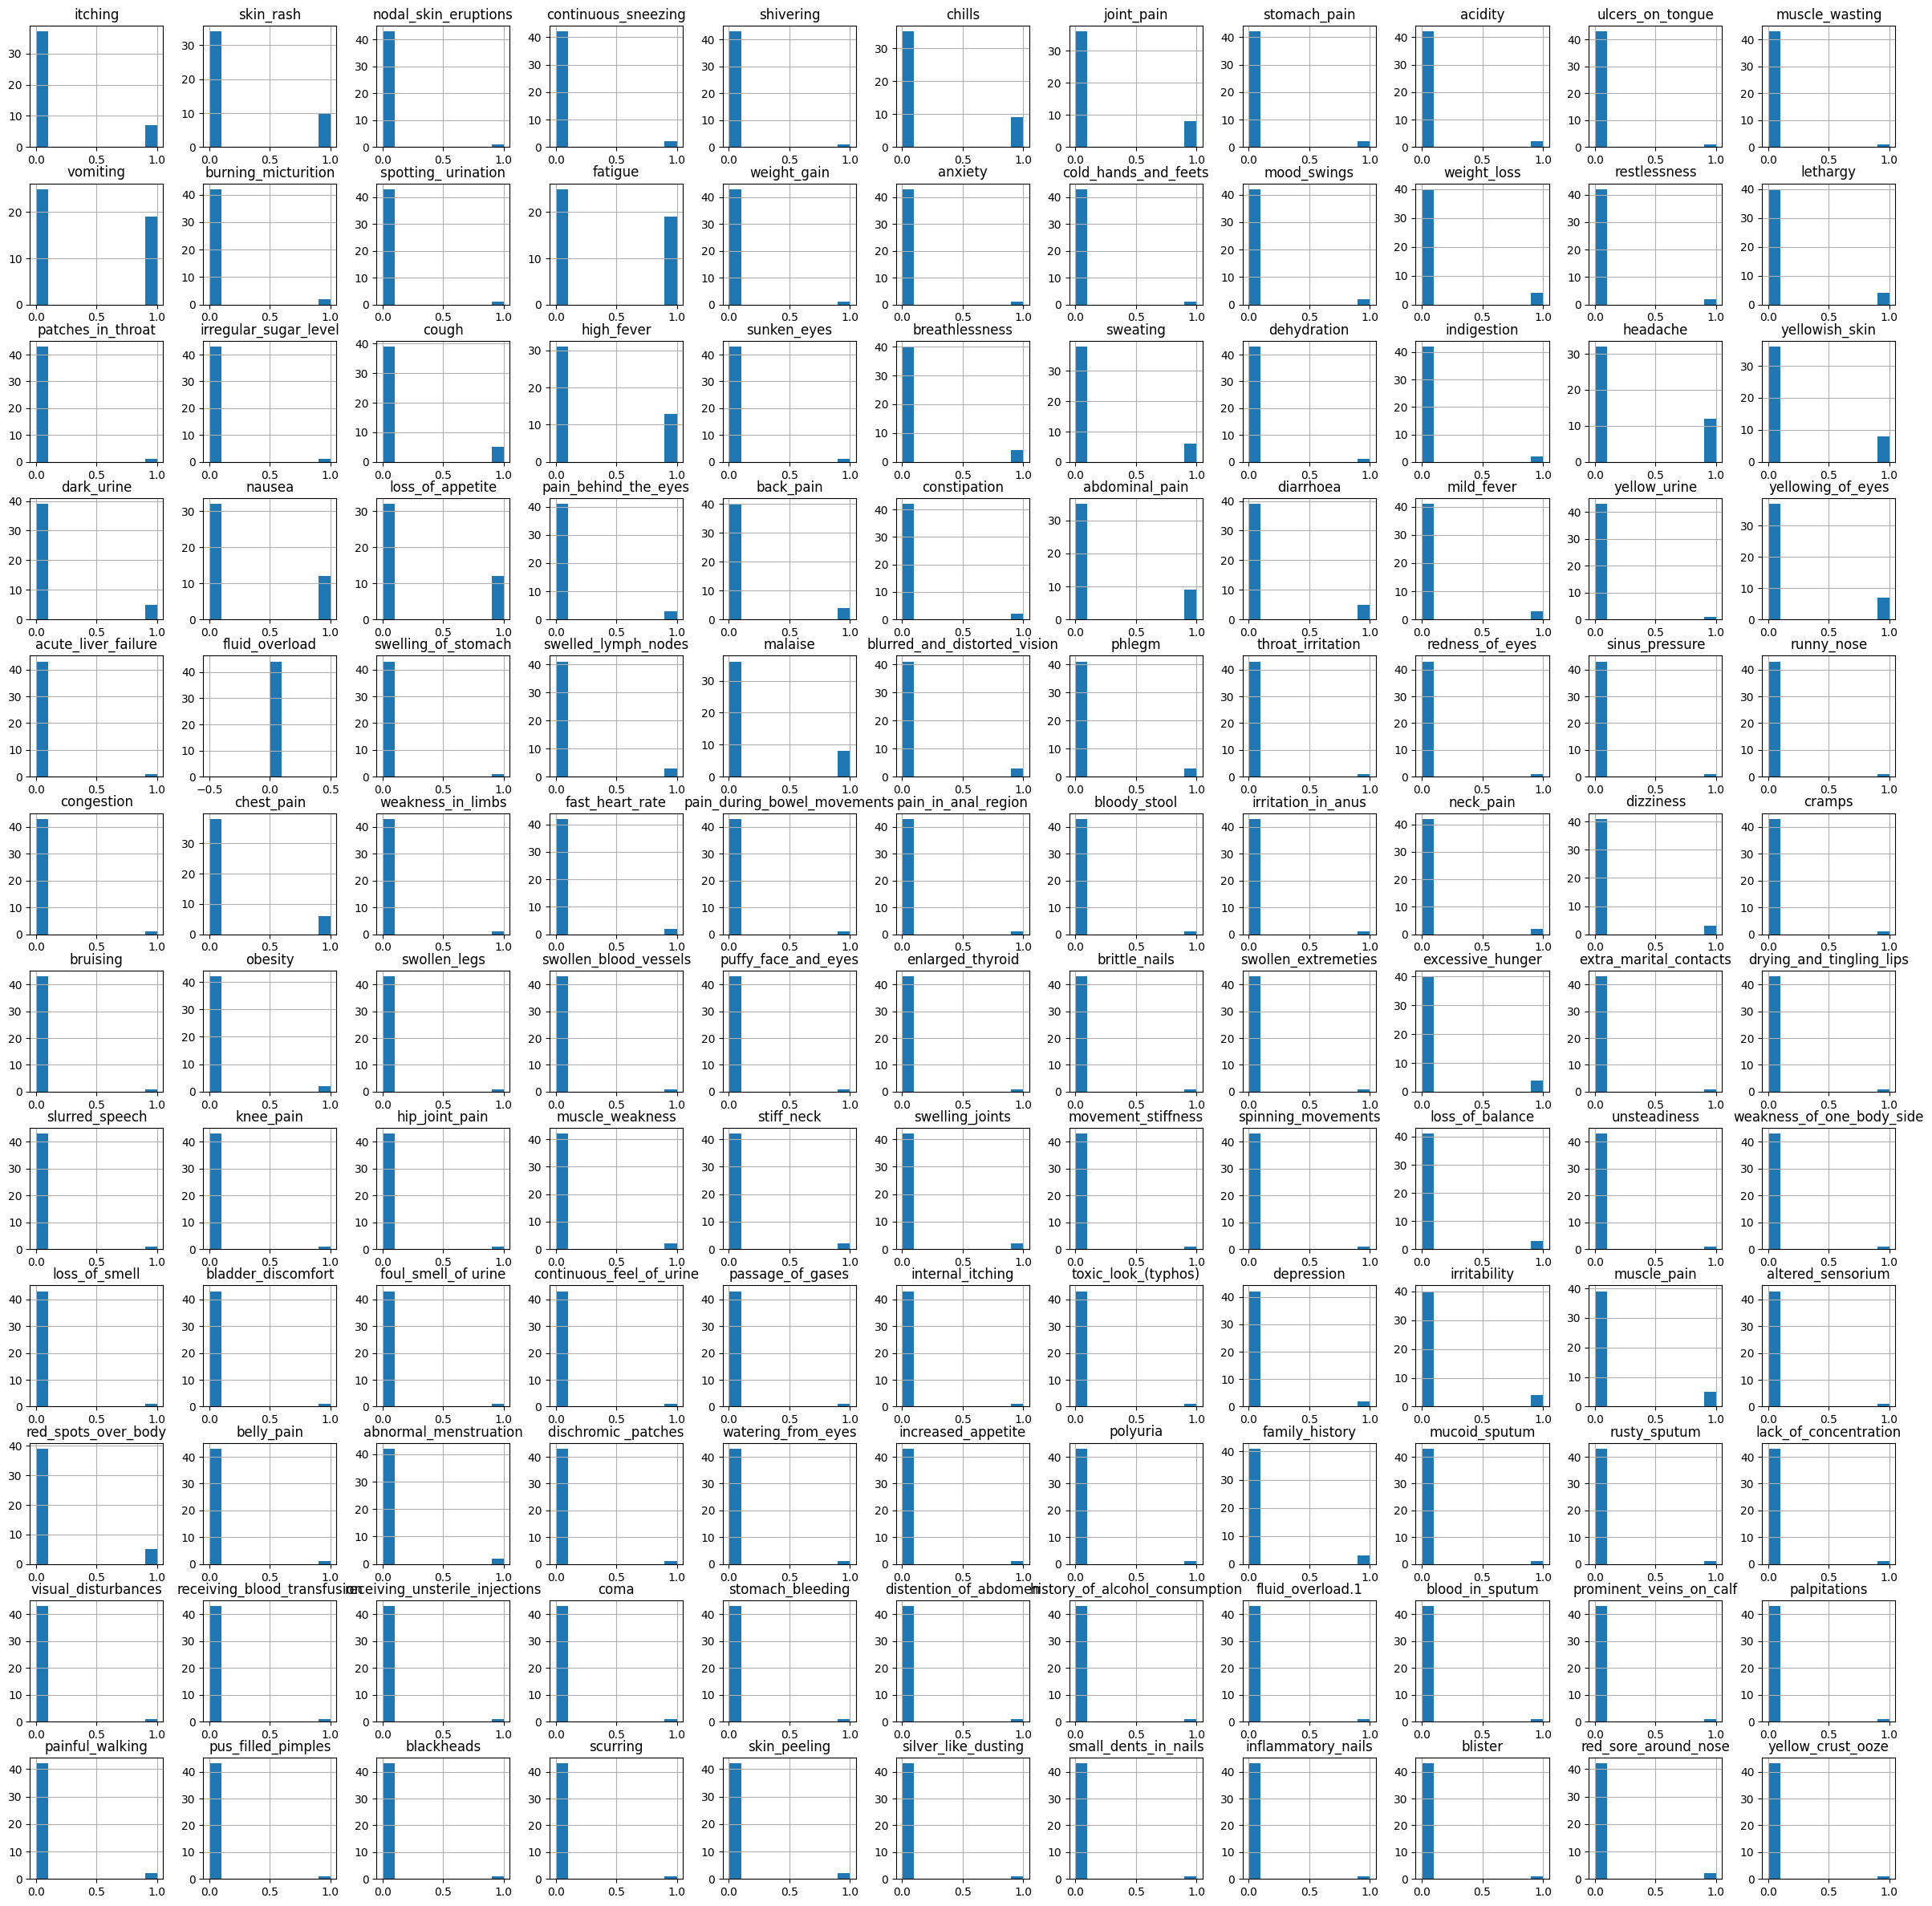

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots_adjust(left=0.1, right=6.9, bottom=1.1, top=1.9, wspace=4.4, hspace=4.4)


test_data.hist(bins=10, figsize=(30,30))
plt.show()

In [92]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

test_data.isnull().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

## Explotary Data Analysis (EDA) for testing data

In [93]:

test_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [94]:
test_data.isnull().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

In [95]:
columns_to_drop = ['itching', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'burning_micturition', 'spotting_ urination', 'weight_gain', 'anxiety', 'cold_hands_and_feets',                 
                  'mood_swings', 'weight_loss', 'restlessness', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'sunken_eyes', 'breathlessness', 'dehydration', 'indigestion', 'yellowish_skin',                         
                  'dark_urine', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region',
                  'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails',                         
                  'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
                  'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases',                       
                  'internal_itching', 'depression', 'irritability', 'altered_sensorium', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration',
                  'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum',                        
                  'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister','red_sore_around_nose', 'yellow_crust_ooze']


test_data.drop(columns=columns_to_drop, inplace=True)


In [96]:
testing_prepared_dataset_new_pd =test_data
testing_prepared_dataset_new_pd.head(20)

,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,vomiting,fatigue,lethargy,high_fever,sweating,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,swelled_lymph_nodes,malaise,toxic_look_(typhos),muscle_pain,red_spots_over_body,belly_pain,dischromic _patches,watering_from_eyes
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
testing_prepared_dataset_new_pd.isnull().sum()

skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
chills                  0
joint_pain              0
vomiting                0
fatigue                 0
lethargy                0
high_fever              0
sweating                0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
constipation            0
abdominal_pain          0
diarrhoea               0
mild_fever              0
swelled_lymph_nodes     0
malaise                 0
toxic_look_(typhos)     0
muscle_pain             0
red_spots_over_body     0
belly_pain              0
dischromic _patches     0
watering_from_eyes      0
dtype: int64

In [98]:
testing_prepared_dataset_new_pd

,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,vomiting,fatigue,lethargy,high_fever,sweating,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,swelled_lymph_nodes,malaise,toxic_look_(typhos),muscle_pain,red_spots_over_body,belly_pain,dischromic _patches,watering_from_eyes
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


skin_rash               0
nodal_skin_             0
continuous_sneezing     0
shivering               0
chills                  0
joint_pain              0
vomiting                0
fatigue                 0
lethargy                0
high_fever              0
sweating                0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
constipation            0
abdominal_pain          0
diarrhoea               0
mild_fever              0
swelled_lymph_nodes     0
malaise                 0
toxic_look_(typhos)     0
muscle_pain             0
red_spots_over_body     0
belly_pain              0
dischromic _patches     0
watering_from_eyes      0
Temp                    0
dtype: int64

In [99]:
# # Save testing_set_pd dataset file
testing_prepared_dataset_new_pd.to_csv("testing_prepared_dataset_new_pd.csv", index=False)

print("test data file saved successfully.")

test data file saved successfully.


In [100]:
testing_set_new_dataset_pd_new = pd.read_csv("testing_prepared_dataset_new_pd.csv")

In [101]:
testing_set_new_dataset_pd_new

,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,vomiting,fatigue,lethargy,high_fever,sweating,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,swelled_lymph_nodes,malaise,toxic_look_(typhos),muscle_pain,red_spots_over_body,belly_pain,dischromic _patches,watering_from_eyes
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
# Store test PassengerIds for later use
test_backpain_column = testing_set_new_dataset_pd_new[["lethargy", "high_fever", "nausea"]]



In [103]:
test_backpain_column

,lethargy,high_fever,nausea
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,0
5,0,0,0
6,0,1,0
7,1,0,0
8,0,0,0
9,0,1,0


In [104]:
# Extract the symptoms columns from the testing dataset
test_symptoms_column = testing_set_new_dataset_pd_new[["skin_rash", "lethargy", "nodal_skin_eruptions", "continuous_sneezing", "shivering", 
                                                      "chills", "joint_pain", "vomiting", "fatigue", "lethargy", "high_fever", "sweating", 
                                                "headache", "nausea", "loss_of_appetite", "pain_behind_the_eyes", "back_pain", "constipation", 
                                                      "abdominal_pain", "diarrhoea", "mild_fever", "swelled_lymph_nodes", "malaise", "toxic_look_(typhos)", 
                                                      "muscle_pain", "red_spots_over_body", "belly_pain", "dischromic _patches", "watering_from_eyes"]]

# Predictions on the test set
test_set_predictions = logreg_model.predict(testing_set_new_dataset_pd_new)

# Create submission DataFrame
submission_df = pd.DataFrame({
    "Symptom_1": test_symptoms_column.iloc[:, 0],  # Assuming itching is the first symptom column
    "Symptom_2": test_symptoms_column.iloc[:, 1],  # Assuming skin_rash is the second symptom column
    "Symptom_3": test_symptoms_column.iloc[:, 2],
    "Symptom_4": test_symptoms_column.iloc[:, 3],
    "Symptom_5": test_symptoms_column.iloc[:, 4],
    "Symptom_6": test_symptoms_column.iloc[:, 5],
    "symptom_7": test_symptoms_column.iloc[:, 6],
    "symptom_8": test_symptoms_column.iloc[:, 7],
    "symptom_8": test_symptoms_column.iloc[:, 8],
    "symptom_9": test_symptoms_column.iloc[:, 9],
    "symptom_10": test_symptoms_column.iloc[:, 10],
    "symptom_11": test_symptoms_column.iloc[:, 11],
    "symptom_12": test_symptoms_column.iloc[:, 12],
    "symptom_13": test_symptoms_column.iloc[:, 13],
    "symptom_14": test_symptoms_column.iloc[:, 14],
    "symptom_15": test_symptoms_column.iloc[:, 15],
    "symptom_16": test_symptoms_column.iloc[:, 16],
    "symptom_17": test_symptoms_column.iloc[:, 17],
    "symptom_18": test_symptoms_column.iloc[:, 18],
    "symptom_19": test_symptoms_column.iloc[:, 19],
    "symptom_20": test_symptoms_column.iloc[:, 20],
    "symptom_21": test_symptoms_column.iloc[:, 21],
    "symptom_22": test_symptoms_column.iloc[:, 22],
    "symptom_23": test_symptoms_column.iloc[:, 23],
    "symptom_24": test_symptoms_column.iloc[:, 24],
    "symptom_25": test_symptoms_column.iloc[:, 25],
    "symptom_26": test_symptoms_column.iloc[:, 26],
    "symptom_27": test_symptoms_column.iloc[:, 27],
    "symptom_28": test_symptoms_column.iloc[:, 28],
    
    # Repeat this for the other symptom columns
    "Prognosis": test_set_predictions
})

# Save submission DataFrame to CSV file
submission_df.to_csv('submission.csv', index=False)
print(submission_df.head(50))


    Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0           1          0          1          0          0          0   
1           0          0          0          1          1          1   
2           0          0          0          0          0          0   
3           0          0          0          0          0          0   
4           1          0          0          0          0          0   
5           0          0          0          0          0          0   
6           0          0          0          0          0          0   
7           0          1          0          0          0          0   
8           0          0          0          0          0          0   
9           0          0          0          0          0          0   
10          0          0          0          0          0          0   
11          0          0          0          0          0          0   
12          0          0          0          0          0       

In [105]:

pred = logreg_model.predict([[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]])
if pred[0] == 0:
  print("Dengue is not infected")
else:
  print("Dengue is infected")

Dengue is infected


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
